# Determining the Ice thickness of Vatnajokull based on H/V spectral ratio

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
root = "D:\MEMOIRE\Ice_thickness"
alt_glacier = '\point_altitude_glacier\point_altitude_glacier.csv'
station = "\lt_nodes_ablation_lambert.csv"
hvsr_fold = "D:\MEMOIRE\Geopsy_res\DATE_7_12"

In [3]:
with open(root+alt_glacier) as file :
    glac_alt = []
    pos = []
    line = 0
    readcsv = csv.reader(file, delimiter=',')
    for row in readcsv :
        if line > 0 :
            glac_alt.append(float(row[-1]))
            pos.append(float(row[3])/1000)
        line += 1
print(len(pos))
print(len(glac_alt))

1430
1430


In [4]:
filepath = root+station
print(filepath)
with open(filepath) as file :
    stt = []
    readcsv = csv.reader(file, delimiter=',')
    i = 0
    line = 0
    for row in readcsv :
        if line > 0 :
            stt.append([row[1]])
            stt[i].extend(row[4:7])
            i += 1
        line += 1
        
def sortThird(val):
    return val[2]
stt.sort(key=sortThird)

node_alt = []
name_station = []
for line in stt :
    node_alt.append(float(line[3]))
    name_station.append(line[0])

print(len(node_alt))

D:\MEMOIRE\Ice_thickness\lt_nodes_ablation_lambert.csv
6


In [5]:
stt

[['20773', '1756930.67057778', '1205501.31065622', '852'],
 ['20781', '1757497.77467811', '1211646.50005961', '1010'],
 ['20769', '1757998.30222875', '1219120.85828483', '1159'],
 ['20774', '1763952.64283821', '1223207.58530924', '1294'],
 ['20739', '1769274.68255682', '1227414.53980666', '1445'],
 ['20754', '1772111.64287197', '1232383.33887074', '1505']]

In [6]:
def distance_station(stt) :
    DIST_orign = [0]
    for i in range(1,len(stt)) :
        diff_X = float(stt[i][1]) - float(stt[i-1][1])
        diff_Y = float(stt[i][2]) - float(stt[i-1][2])
        dist = (diff_X**2+diff_Y**2)**(1/2)
        DIST_orign.append((DIST_orign[i-1]*1000+dist)/1000)
    return DIST_orign
DIST = distance_station(stt)
print(len(DIST))
#print(DIST)

6


In [7]:
print(name_station)

['20773', '20781', '20769', '20774', '20739', '20754']


###### La oldest ice : Qu'est-ce que c'est ? partir sur où on la trouve, comment on la trouve et quel est l'intéret.

In [8]:
F0 = []
vs = 1900
H = []

YERRORHIGH = []
YERRORLOW = []
YERROR = []

FREQ = []
AMP_AVE = []

for nme_stt in name_station :   
    filepath = hvsr_fold+'\SS_'+ nme_stt +'.hv'
    print(filepath)
    line = 0
    with open(filepath) as file :
        tmpFREQ = []
        tmpAMP_AVE = []
        readcsv = csv.reader(file, delimiter='\t')
        for row in readcsv :
            line += 1
            if line == 5 :
                #print(row)
                f0 = float(row[1]) #extracting the f0 in the hv file
                #print(row[2])
                F0.append(f0)
                h = vs/(4.0*f0) #calculation of ice thickness
                H.append(h) #save ice thickness in a list
                yhigh = vs/(4.0*(float(row[3]))) #calculate the standart deviation of f0
                ylow = vs/(4.0*(float(row[2])))
                YERRORHIGH.append(h-yhigh)
                YERRORLOW.append(ylow-h)
            if line >= 10 and float(row[0]) >= 0.5  :
                tmpFREQ.append(float(row[0]))
                tmpAMP_AVE.append(float(row[1]))
    FREQ.append(np.array(tmpFREQ))
    AMP_AVE.append(np.array(tmpAMP_AVE))

FREQ = np.array(FREQ, dtype=object)
AMP_AVE = np.array(AMP_AVE, dtype=object)

BED_ALT = np.subtract(node_alt, H)
XERROR = ((vs/4)*np.power(F0, -1))/1000 #Lambda/4 where lambda = Vs/f0
#YERRORHIGH = 10*np.array(YERRORHIGH)
YERROR.append(YERRORLOW)
YERROR.append(YERRORHIGH)
#print(F0)
#print(H)
#print(BED_ALT)
#print(XERROR)
#print(YERROR)

D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20773.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20781.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20769.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20774.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20739.hv
D:\MEMOIRE\Geopsy_res\DATE_7_12\SS_20754.hv


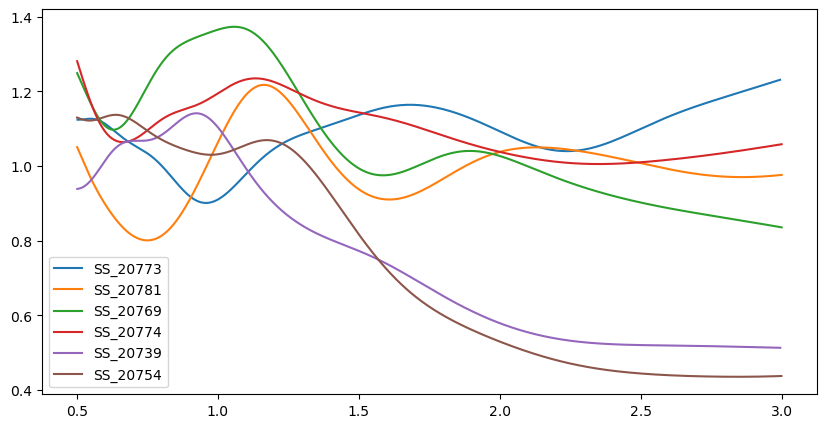

In [9]:
fig = plt.figure(figsize=(10,5))
for i in range(len(FREQ)) :
    plt.plot(FREQ[i], AMP_AVE[i], label='SS_'+str(name_station[i]))
plt.legend()
plt.savefig('plot_ice_thick/HVCurve.png')
plt.show()

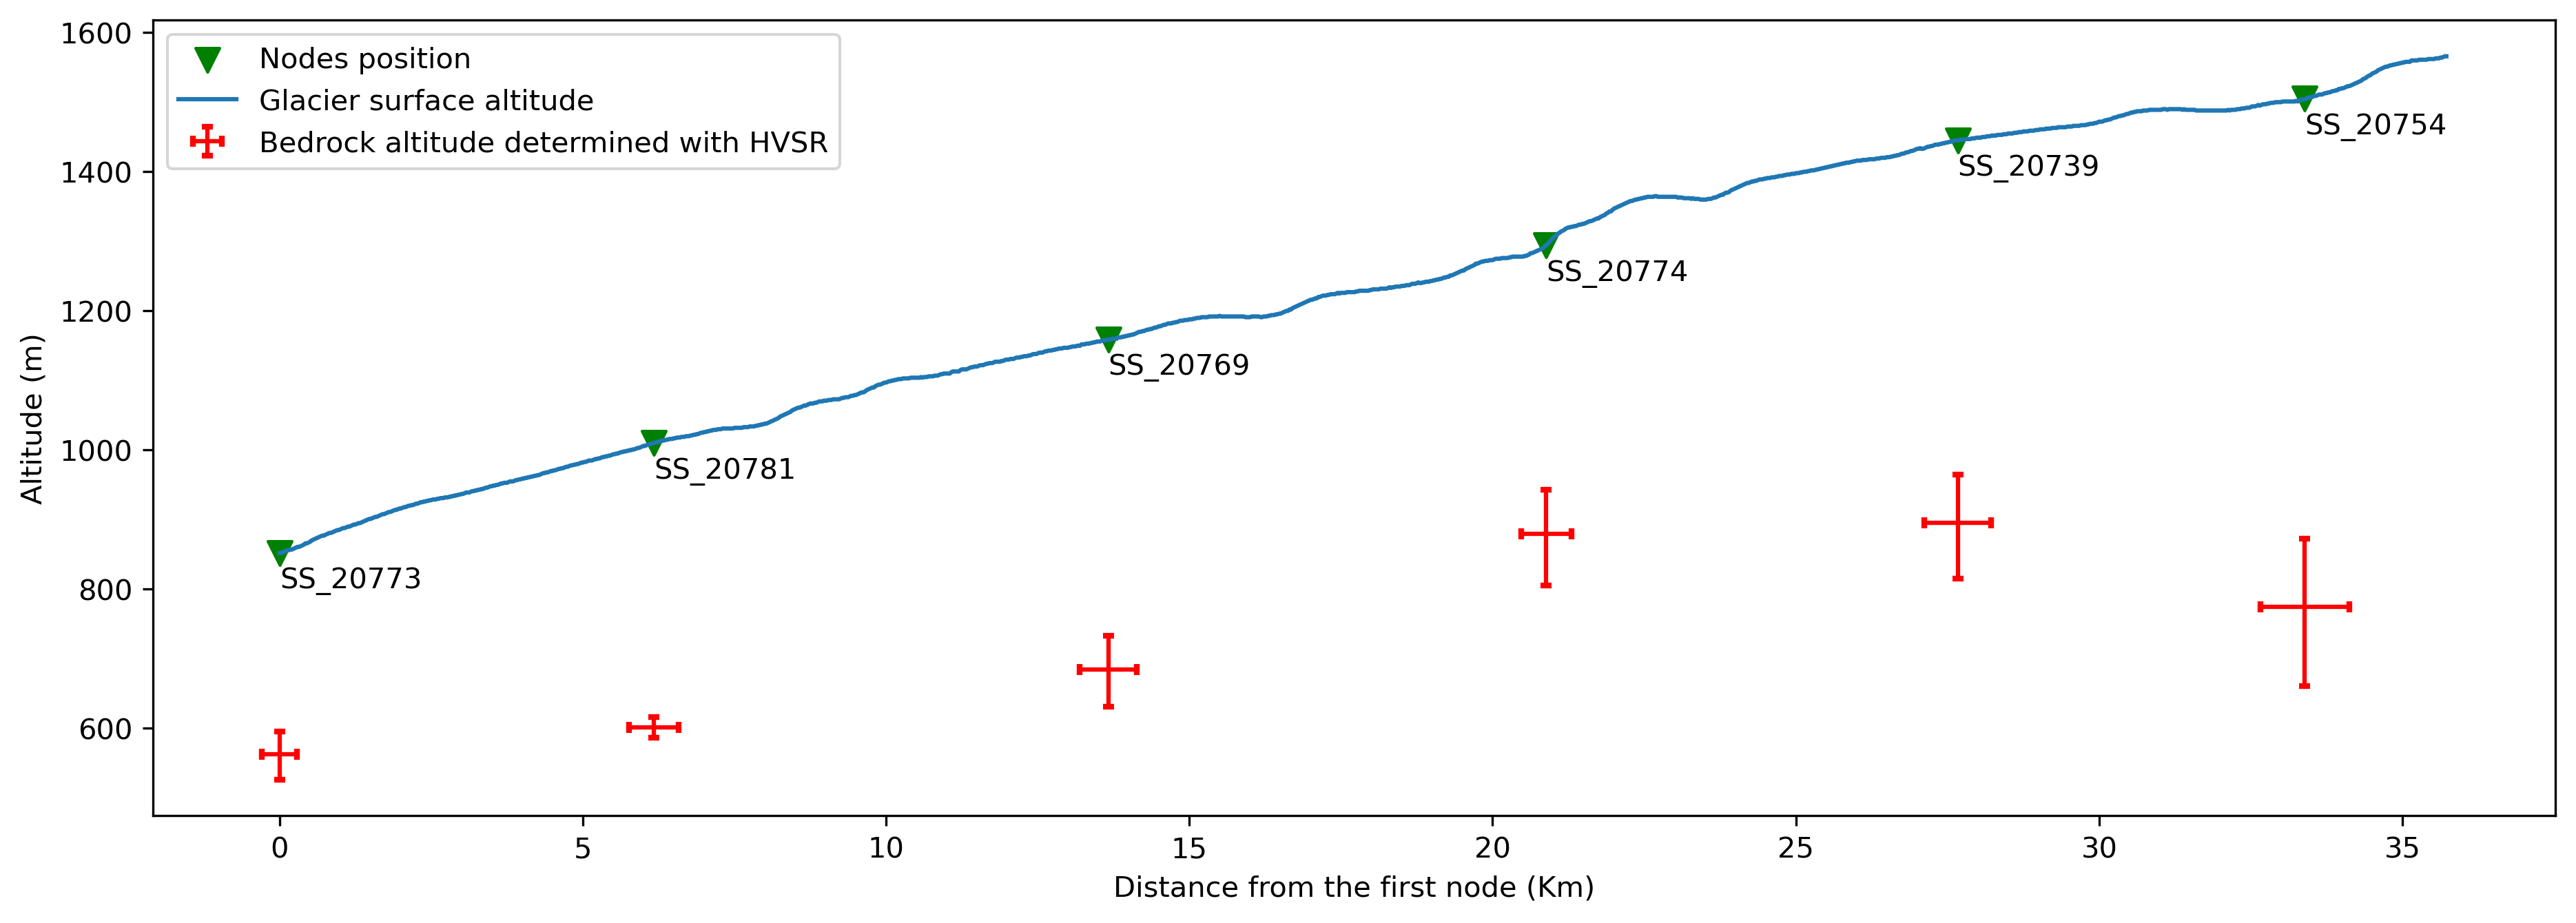

In [10]:
plt.figure(figsize=(15, 5), dpi=300)
plt.scatter(DIST, node_alt, s=70 , c='green', marker='v', label = 'Nodes position')
#plt.scatter(DIST, BED_ALT, s=60, c='red',marker='o')
plt.plot(pos, glac_alt, label = 'Glacier surface altitude')
plt.errorbar(DIST,BED_ALT,xerr = XERROR, yerr = YERROR, linestyle='None', ecolor= 'red', capsize=2, capthick=2, label = 'Bedrock altitude determined with HVSR')
for i in range(len(DIST)) :
    plt.text(DIST[i],node_alt[i]-50,'SS_'+name_station[i])
plt.xlabel('Distance from the first node (Km)')
plt.ylabel('Altitude (m)')
plt.legend()
plt.savefig('plot_ice_thick/ice_thickness.png')
plt.show()

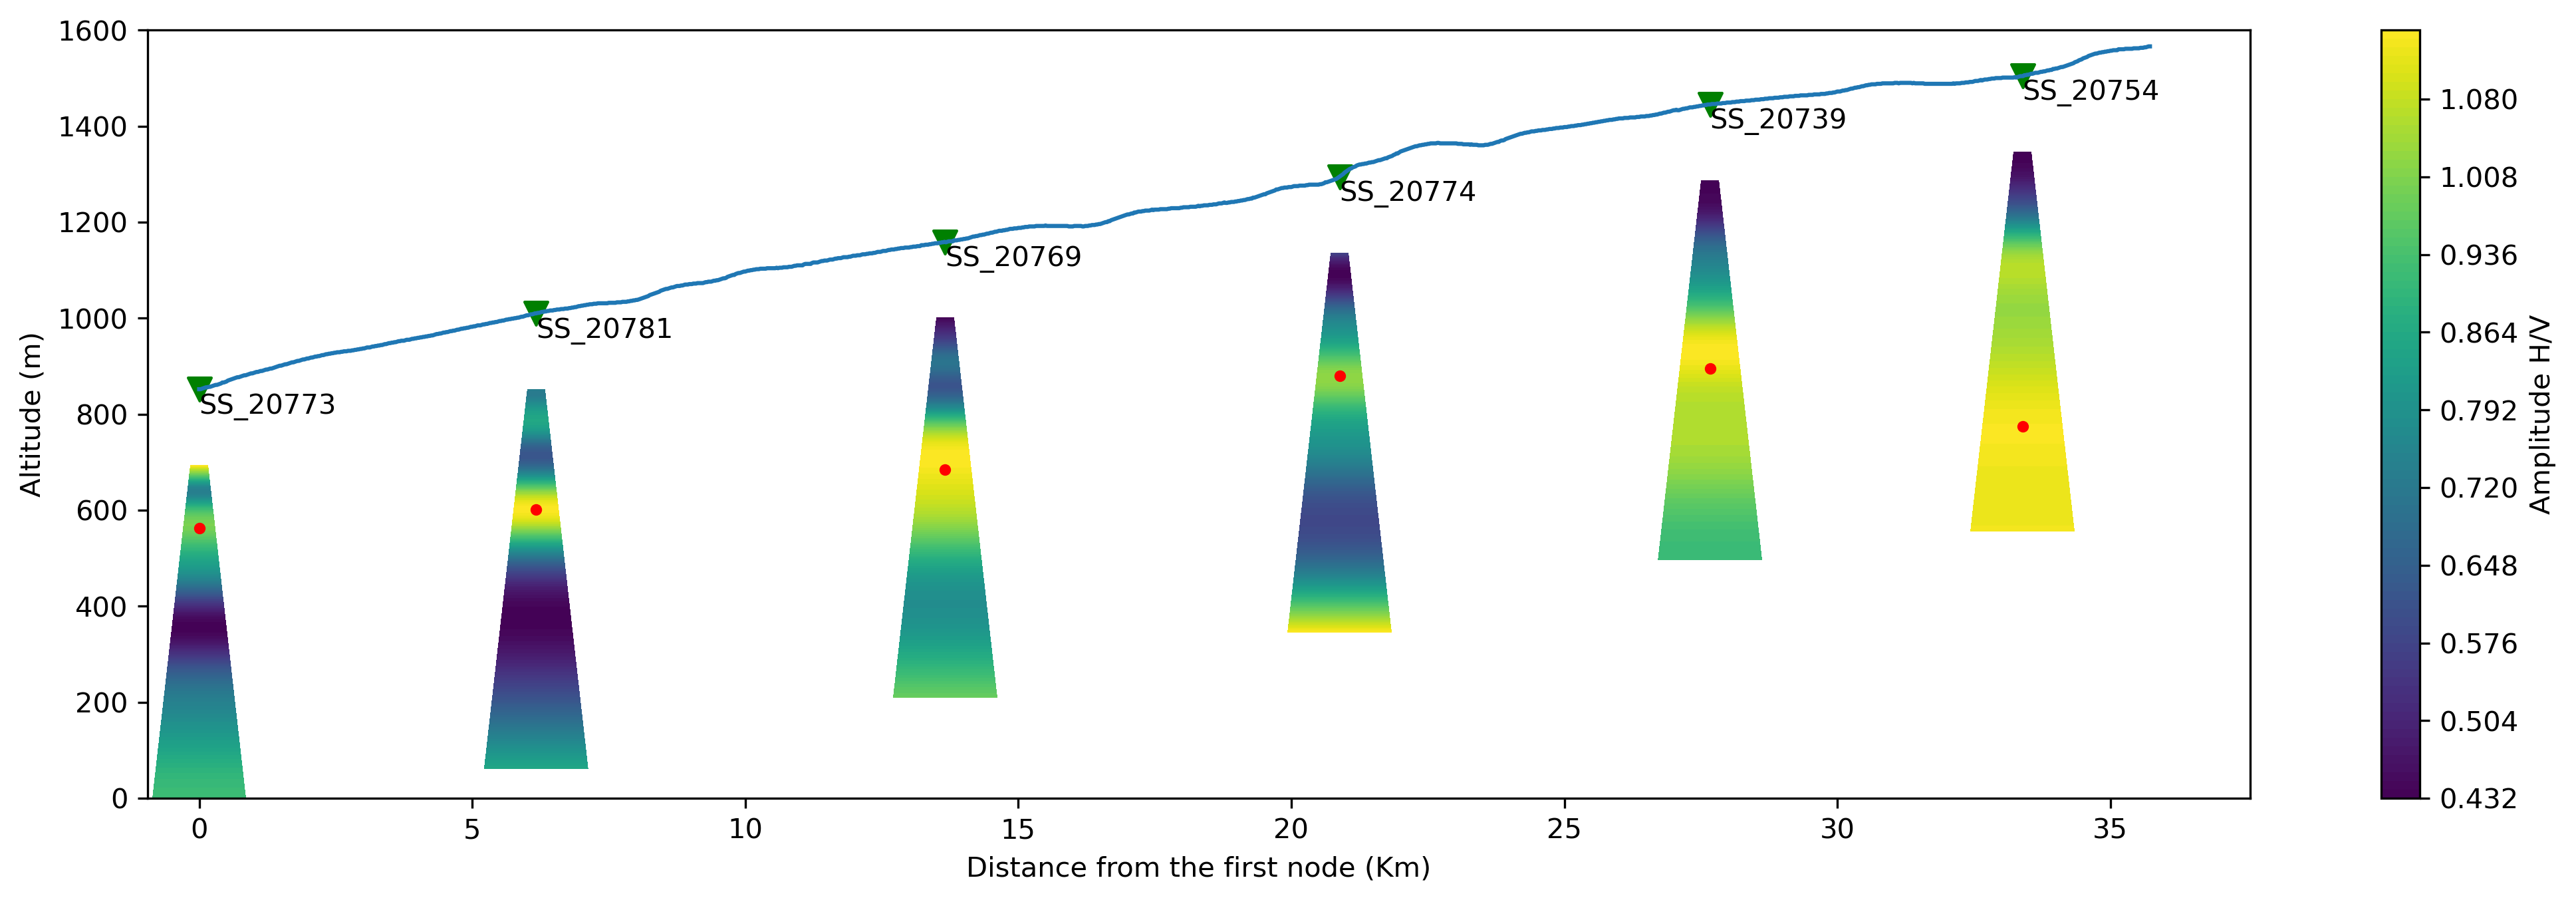

In [11]:
plt.figure(figsize=(17, 5), dpi=300)

for i in range(len(FREQ)) :
    L0 = [DIST[i]]*len(FREQ[i])
    L01 = L0 - ((vs/4)*np.power(FREQ[i], -1))/1000
    L1 = L0 + ((vs/4)*np.power(FREQ[i], -1))/1000
    L = []
    L.append(L01)
    L.append(L0)
    L.append(L1)
    L = np.array(L)
    
    HTOT = 1900/(4*np.array(FREQ[i]))
    HTOT = node_alt[i] - HTOT
    
    testFREQ = []
    testFREQ.append(HTOT)
    testFREQ.append(HTOT)
    testFREQ.append(HTOT)
    testFREQ = np.array(testFREQ)

    testAMP = []
    testAMP.append(AMP_AVE[i])
    testAMP.append(AMP_AVE[i])
    testAMP.append(AMP_AVE[i])
    testAMP = np.array(testAMP)
    plt.ylim(0,1600)
    plt.contourf(L, testFREQ, testAMP, 100)
   
plt.colorbar(label = "Amplitude H/V")
plt.scatter(DIST, node_alt, s=70 , c='green', marker='v', label = 'Nodes position')
plt.plot(pos, glac_alt, label = 'Glacier surface altitude')
plt.scatter(DIST, BED_ALT, s=10, c='red',marker='o')
#plt.errorbar(DIST,BED_ALT,xerr = XERROR, yerr = YERROR, linestyle='None', ecolor= 'red', capsize=2, capthick=2, label = 'Bedrock altitude determined with HVSR')
for i in range(len(DIST)) :
    plt.text(DIST[i],node_alt[i]-50,'SS_'+name_station[i])
plt.xlabel('Distance from the first node (Km)')
plt.ylabel('Altitude (m)')
plt.savefig('plot_ice_thick/HVintensity_ice_thickness.png')
plt.show()


## Automated HVSR computing with hvsrpy module

Credit : https://github.com/jpvantassel/hvsrpy/blob/main/examples/simple_hvsrpy_interface.ipynb

In [13]:
import hvsrpy
import obspy
import time
import datetime

In [16]:
def hvsr_export(filename, fields, ROW) :
    with open(filename, 'w') as csvfile: 
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 

        # writing the fields 
        csvwriter.writerow(fields) 

        # writing the data rows 
        csvwriter.writerows(ROW)

In [17]:
def hv_maximum(sensor, starttime, endtime, windowlenght, f_min, f_max) :
    startprocess = time.process_time() 
    
    distribution_mc = "lognormal"
    
    width = 0.1 #Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
    bandwidth = 30 # Konno and Ohmachi smoothing constant


    # Boolean to control whether Butterworth filter is applied. 
    # Geopsy does not apply a bandpass filter.
    filter_bool = False        
    # Low-cut frequency for bandpass filter.
    filter_flow = 0.1                   
    # High-cut frequency for bandpass filter.
    filter_fhigh = 30                   
    # Filter order.
    filter_order = 5
    bp_filter = {"flag":filter_bool, "flow":filter_flow, "fhigh":filter_fhigh, "order":filter_order}

    # Minimum frequency after resampling
    resample_fmin = f_min  
    # Maximum frequency after resampling
    resample_fmax = f_max
    # Number of frequencies after resampling
    resample_fnum = 200
    # Type of resampling {'log', 'linear'}
    resample_type = 'log'

    resampling = {"minf":resample_fmin, "maxf":resample_fmax, "nf":resample_fnum, "res_type":resample_type}

    # Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
    peak_f_lower = f_min
    peak_f_upper = f_max
    # Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
    method = "geometric-mean"
    # If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
    azimuth = 0

    hv = sensor.hv(windowlenght, bp_filter, width, bandwidth, resampling, method, 
               f_low=peak_f_lower, f_high=peak_f_upper, azimuth=azimuth)
    
    #max_freq = hv.mc_peak_frq(distribution_mc)
    
    #max_amp = hv.mc_peak_amp(distribution_mc)
    
    meanamp = hv.mean_curve(distribution_mc)
    
    frq = hv.frq
    
    endprocess = time.process_time()
    print('Processing accomplished in '+str(endprocess-startprocess)+' seconds')
    
    return meanamp, frq


Starting the time loop
[UTCDateTime(2022, 5, 8, 0, 0), UTCDateTime(2022, 5, 8, 2, 0)]
Processing accomplished in 39.046875 seconds
[UTCDateTime(2022, 5, 8, 2, 0), UTCDateTime(2022, 5, 8, 4, 0)]
Processing accomplished in 45.3125 seconds
[UTCDateTime(2022, 5, 8, 4, 0), UTCDateTime(2022, 5, 8, 6, 0)]
Processing accomplished in 47.25 seconds
[UTCDateTime(2022, 5, 8, 6, 0), UTCDateTime(2022, 5, 8, 8, 0)]
Processing accomplished in 41.703125 seconds


C:\Users\julie\AppData\Local\Temp\ipykernel_20528\3318497317.py:63: UserWarning: Attempting to set identical left == right == 19120.166666666668 results in singular transformations; automatically expanding.
  plt.contourf(ContiHVTime, ContiHVFreq,ContiHVAmp, 100)


[UTCDateTime(2022, 5, 8, 8, 0), UTCDateTime(2022, 5, 8, 10, 0)]
Processing accomplished in 42.796875 seconds
[UTCDateTime(2022, 5, 8, 10, 0), UTCDateTime(2022, 5, 8, 12, 0)]
Processing accomplished in 46.75 seconds
[UTCDateTime(2022, 5, 8, 12, 0), UTCDateTime(2022, 5, 8, 14, 0)]
Processing accomplished in 44.421875 seconds
[UTCDateTime(2022, 5, 8, 14, 0), UTCDateTime(2022, 5, 8, 16, 0)]
Processing accomplished in 47.140625 seconds
[UTCDateTime(2022, 5, 8, 16, 0), UTCDateTime(2022, 5, 8, 18, 0)]
Processing accomplished in 46.734375 seconds
[UTCDateTime(2022, 5, 8, 18, 0), UTCDateTime(2022, 5, 8, 20, 0)]
Processing accomplished in 42.15625 seconds
[UTCDateTime(2022, 5, 8, 20, 0), UTCDateTime(2022, 5, 8, 22, 0)]
Processing accomplished in 46.265625 seconds
[UTCDateTime(2022, 5, 8, 22, 0), UTCDateTime(2022, 5, 9, 0, 0)]
Processing accomplished in 47.15625 seconds
Starting the time loop
[UTCDateTime(2022, 5, 9, 0, 0), UTCDateTime(2022, 5, 9, 2, 0)]
Processing accomplished in 46.140625 secon

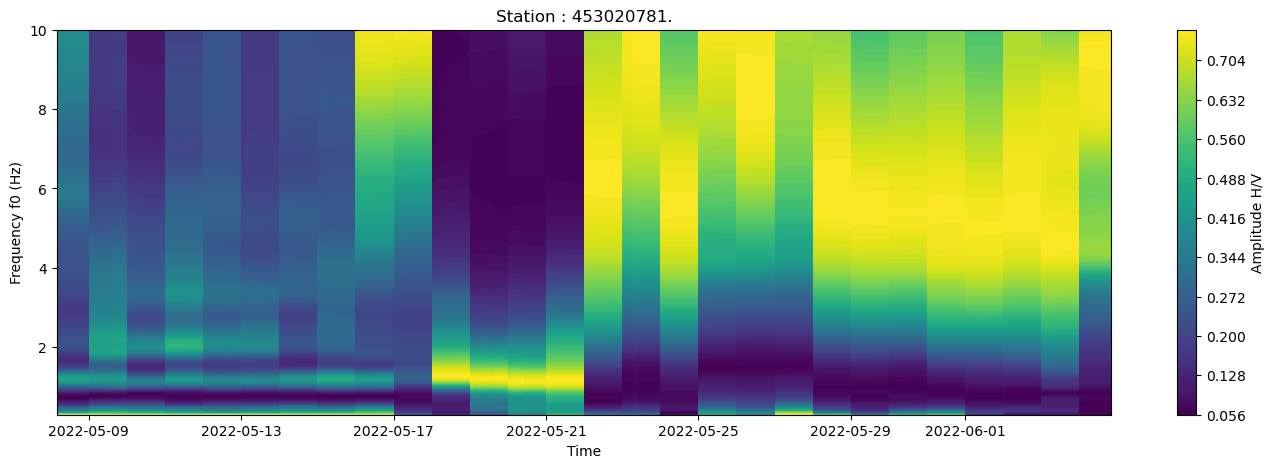

Starting the time loop
[UTCDateTime(2022, 5, 8, 0, 0), UTCDateTime(2022, 5, 8, 2, 0)]
Processing accomplished in 37.1875 seconds
[UTCDateTime(2022, 5, 8, 2, 0), UTCDateTime(2022, 5, 8, 4, 0)]
Processing accomplished in 36.5625 seconds
[UTCDateTime(2022, 5, 8, 4, 0), UTCDateTime(2022, 5, 8, 6, 0)]
Processing accomplished in 35.953125 seconds
[UTCDateTime(2022, 5, 8, 6, 0), UTCDateTime(2022, 5, 8, 8, 0)]
Processing accomplished in 31.796875 seconds
[UTCDateTime(2022, 5, 8, 8, 0), UTCDateTime(2022, 5, 8, 10, 0)]
Processing accomplished in 31.515625 seconds
[UTCDateTime(2022, 5, 8, 10, 0), UTCDateTime(2022, 5, 8, 12, 0)]
Processing accomplished in 31.859375 seconds
[UTCDateTime(2022, 5, 8, 12, 0), UTCDateTime(2022, 5, 8, 14, 0)]
Processing accomplished in 31.921875 seconds
[UTCDateTime(2022, 5, 8, 14, 0), UTCDateTime(2022, 5, 8, 16, 0)]
Processing accomplished in 32.15625 seconds
[UTCDateTime(2022, 5, 8, 16, 0), UTCDateTime(2022, 5, 8, 18, 0)]
Processing accomplished in 31.765625 seconds
[

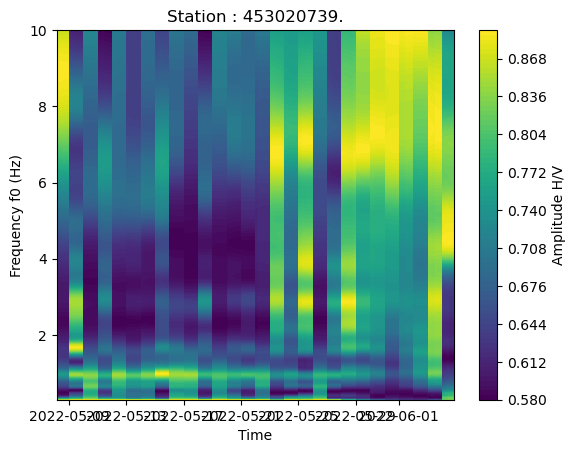

In [30]:
windowlenght = 600 #second
f_min = 0.3
f_max = 10

startdate = '2022.05.08'

startdate = datetime.datetime.strptime(startdate, '%Y.%m.%d')
startnumber = 3
days = 31 - startnumber

HVFREQALL = []
HVAMPALL = []
HVTIMEALL = []

STATION = ['453020781.', '453020739.']



for namestt in STATION :
    plt.figure(figsize=(17,5))
    HVFREQ = []
    HVAMP = []
    HVTIME = []
    for day in range(days) : 
        date = startdate + datetime.timedelta(days = day)
        datetimeStr = date.strftime("%Y.%m.%d.%H.%M.%S.000")
        root = 'D:\\Nodes_ablation_zone\\All_comp_DP_\\'
        stts = {'e': root+namestt+str(startnumber+day)+'.'+datetimeStr+'.E.miniseed', 
                'n': root+namestt+str(startnumber+day)+'.'+datetimeStr+'.N.miniseed',
                'z': root+namestt+str(startnumber+day)+'.'+datetimeStr+'.Z.miniseed'}

        sensor = hvsrpy.Sensor3c.from_mseed(fnames_1c=stts)

        trace = obspy.read(root+namestt+str(startnumber+day)+'.'+datetimeStr+'.E.miniseed')

        timesize = 60*2 #minutes
        timestep = timesize*60
        nbr_timestep = int(24*60*60/timestep)

        starttrace = trace[0].stats.starttime

        print('Starting the time loop')

        for i in range(nbr_timestep) :
            starttime = starttrace+i*timestep
            endtime = starttime+timestep
            print([starttime, endtime])
            meanamp, frq = hv_maximum(sensor, starttime, endtime, windowlenght, f_min, f_max)
            #HVFREQ.append(maxfreq)
            #HVAMP.append(maxamp)
            #temptime = datetime.datetime.strptime(str(starttime+timestep/2), '%Y-%m-%dT%H:%M:%S.000000Z')
            #HVTIME.append(temptime)
            
            name = str(namestt)+str(day)+'.'+str(i)+'.csv'
            
            starttime = datetime.datetime.strptime(str(starttime), '%Y-%m-%dT%H:%M:%S.000000Z')
            endtime = datetime.datetime.strptime(str(endtime), '%Y-%m-%dT%H:%M:%S.000000Z')
            
            ContiHVTime = [np.repeat(starttime, len(frq)), np.repeat(endtime, len(frq))]
            ContiHVFreq = [frq, frq]
            ContiHVAmp = [meanamp, meanamp]

            #plt.plot([endtime,endtime],[0.5,3], c='red', linestyle='--')
            plt.contourf(ContiHVTime, ContiHVFreq,ContiHVAmp, 100)
            
            root = 'res_continuous_HVSR\\'
            filename = root+name
            headers = ['FREQ','AMP']
            ROW = []
            for j in range(len(frq)) :
                ROW.append([frq[j],meanamp[j]])
            hvsr_export(filename, headers, ROW)
            
            
    #HVFREQALL.append(HVFREQ)
    #HVAMPALL.append(HVAMP)
    #HVTIMEALL.append(HVTIME)

    plt.colorbar(label = "Amplitude H/V")
    plt.title('Station : '+str(namestt) )
    plt.xlabel('Time')
    plt.ylabel('Frequency f0 (Hz)')
    plt.savefig('plot_ice_thick/continuous_HVintensity_'+str(namestt)+'.png')    

    plt.show()

Jour : 0
Jour : 1
Jour : 2
Jour : 3
Jour : 4
Jour : 5
Jour : 6
Jour : 7
Jour : 8
Jour : 9
Jour : 10
Jour : 11
Jour : 12
Jour : 13
Jour : 14
Jour : 15
Jour : 16
Jour : 17
Jour : 18
Jour : 19
Jour : 20
Jour : 21
Jour : 22
Jour : 23
Jour : 24
Jour : 25
Jour : 26
Jour : 27


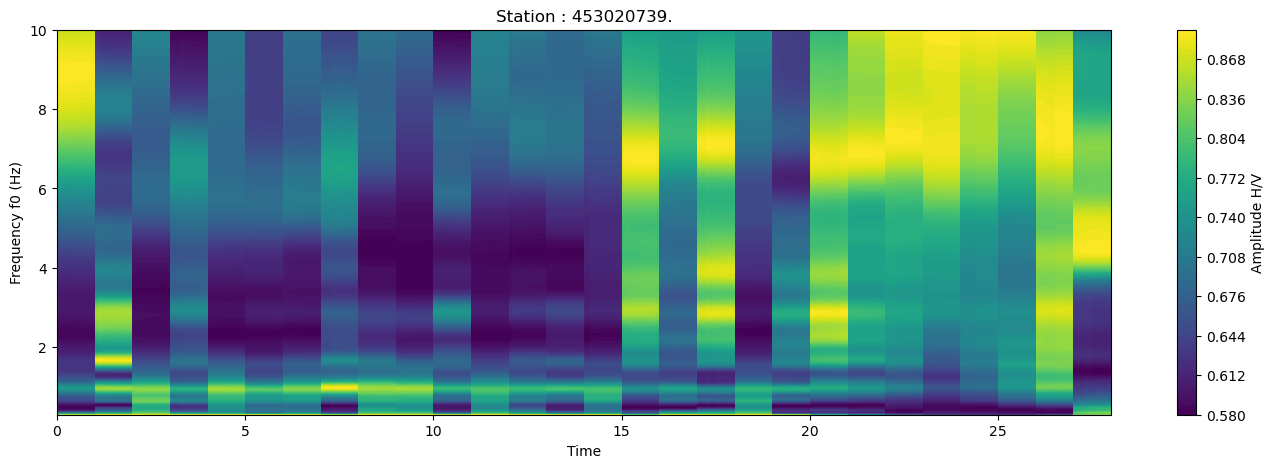

In [42]:
root = 'res_continuous_HVSR\\'
namestt = '453020739.'

fig = plt.figure(figsize=(17,5))

for day in range(28) :
    for i in range(12) :
        filename = str(namestt)+str(day)+'.'+str(i)+'.csv'
        filepath = root+filename
        line = 0
        tmpfrq = []
        tmpamp = []
        with open(filepath) as file :
                readcsv = csv.reader(file, delimiter=',')
                for row in readcsv :
                    if line > 0 and row != [] :
                        tmpfrq.append(row[0])
                        tmpamp.append(row[1])
                    line += 1          
        ContiHVTime = [np.repeat(day+(i/12), len(tmpfrq)), np.repeat(day+((i+1)/12), len(tmpfrq))]
        ContiHVFreq = [tmpfrq, tmpfrq]
        ContiHVAmp = [tmpamp, tmpamp]
        plt.contourf(ContiHVTime, ContiHVFreq,ContiHVAmp, 100)
    print('Jour : '+str(day))    
plt.colorbar(label = "Amplitude H/V")
plt.title('Station : '+str(namestt) )
plt.xlabel('Time')
plt.ylabel('Frequency f0 (Hz)')
plt.savefig('plot_ice_thick/continuous_HVintensity_'+str(namestt)+'.png')    

plt.show()

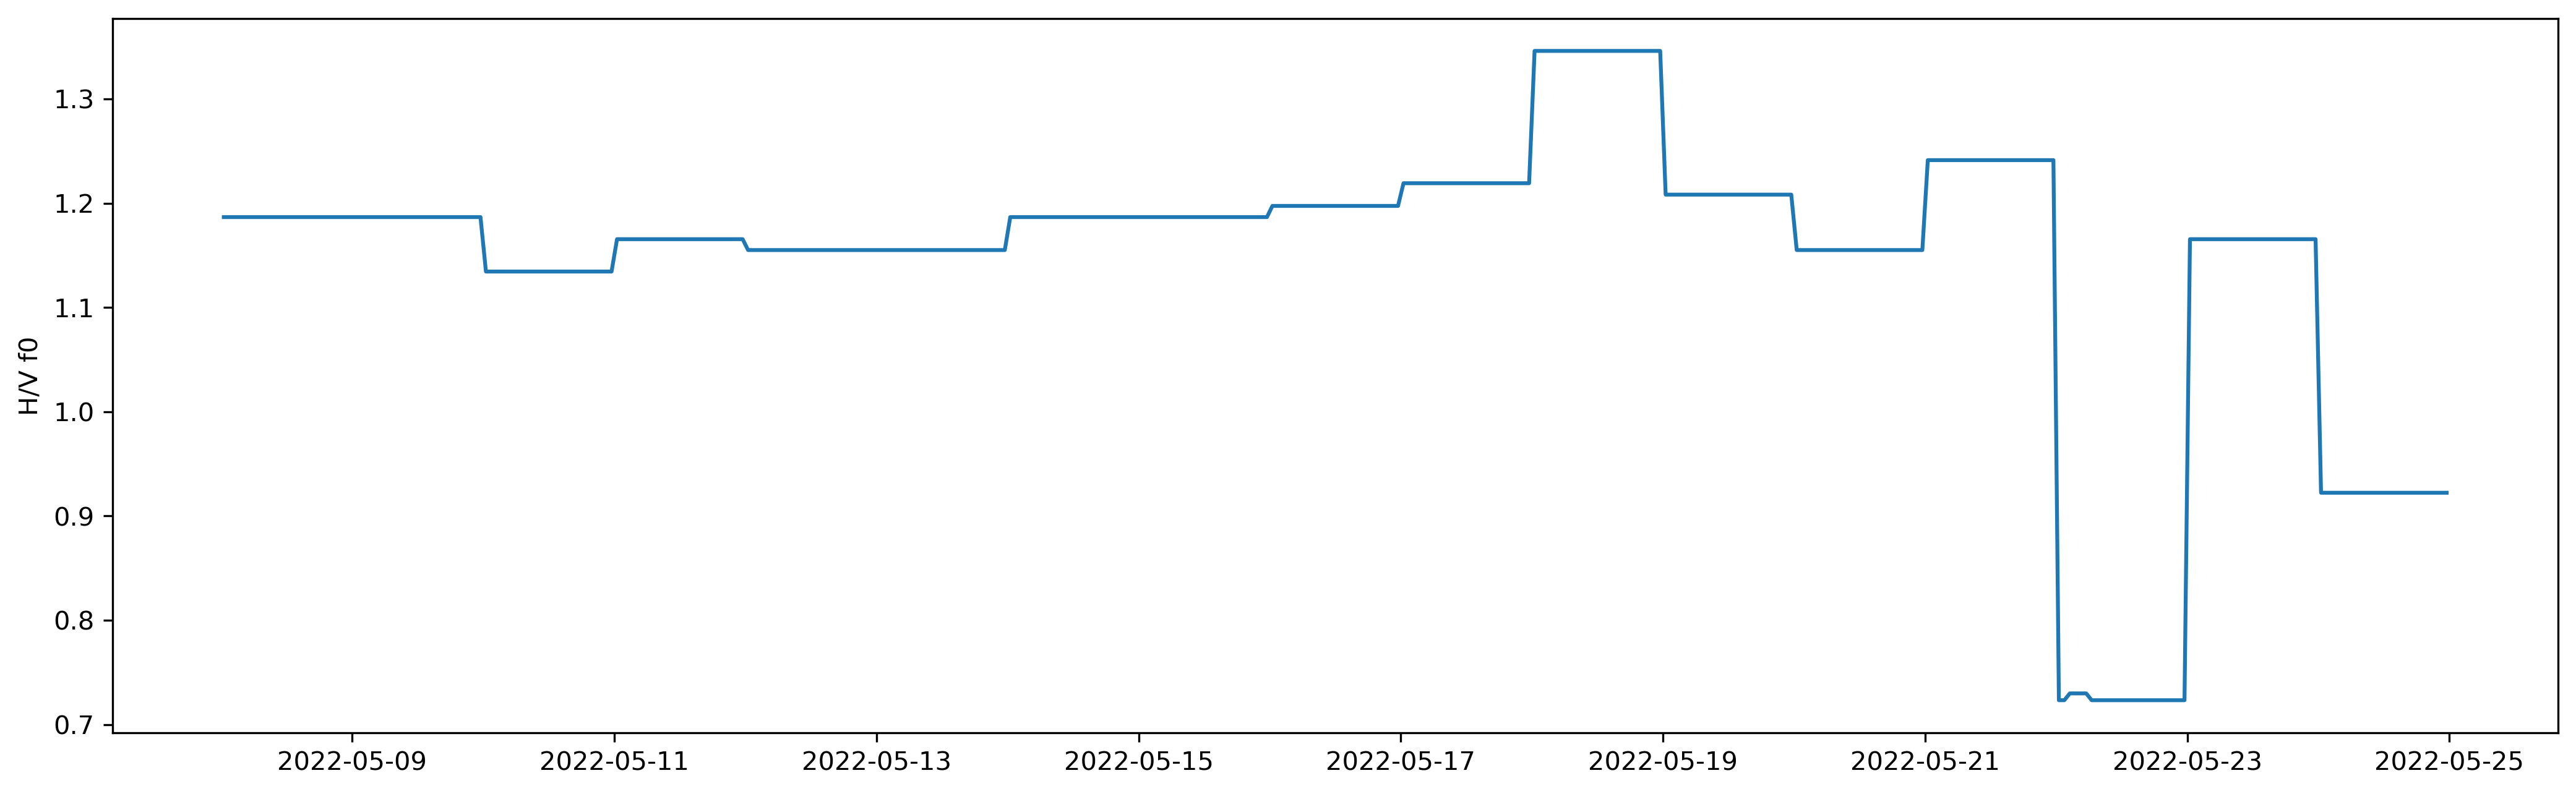

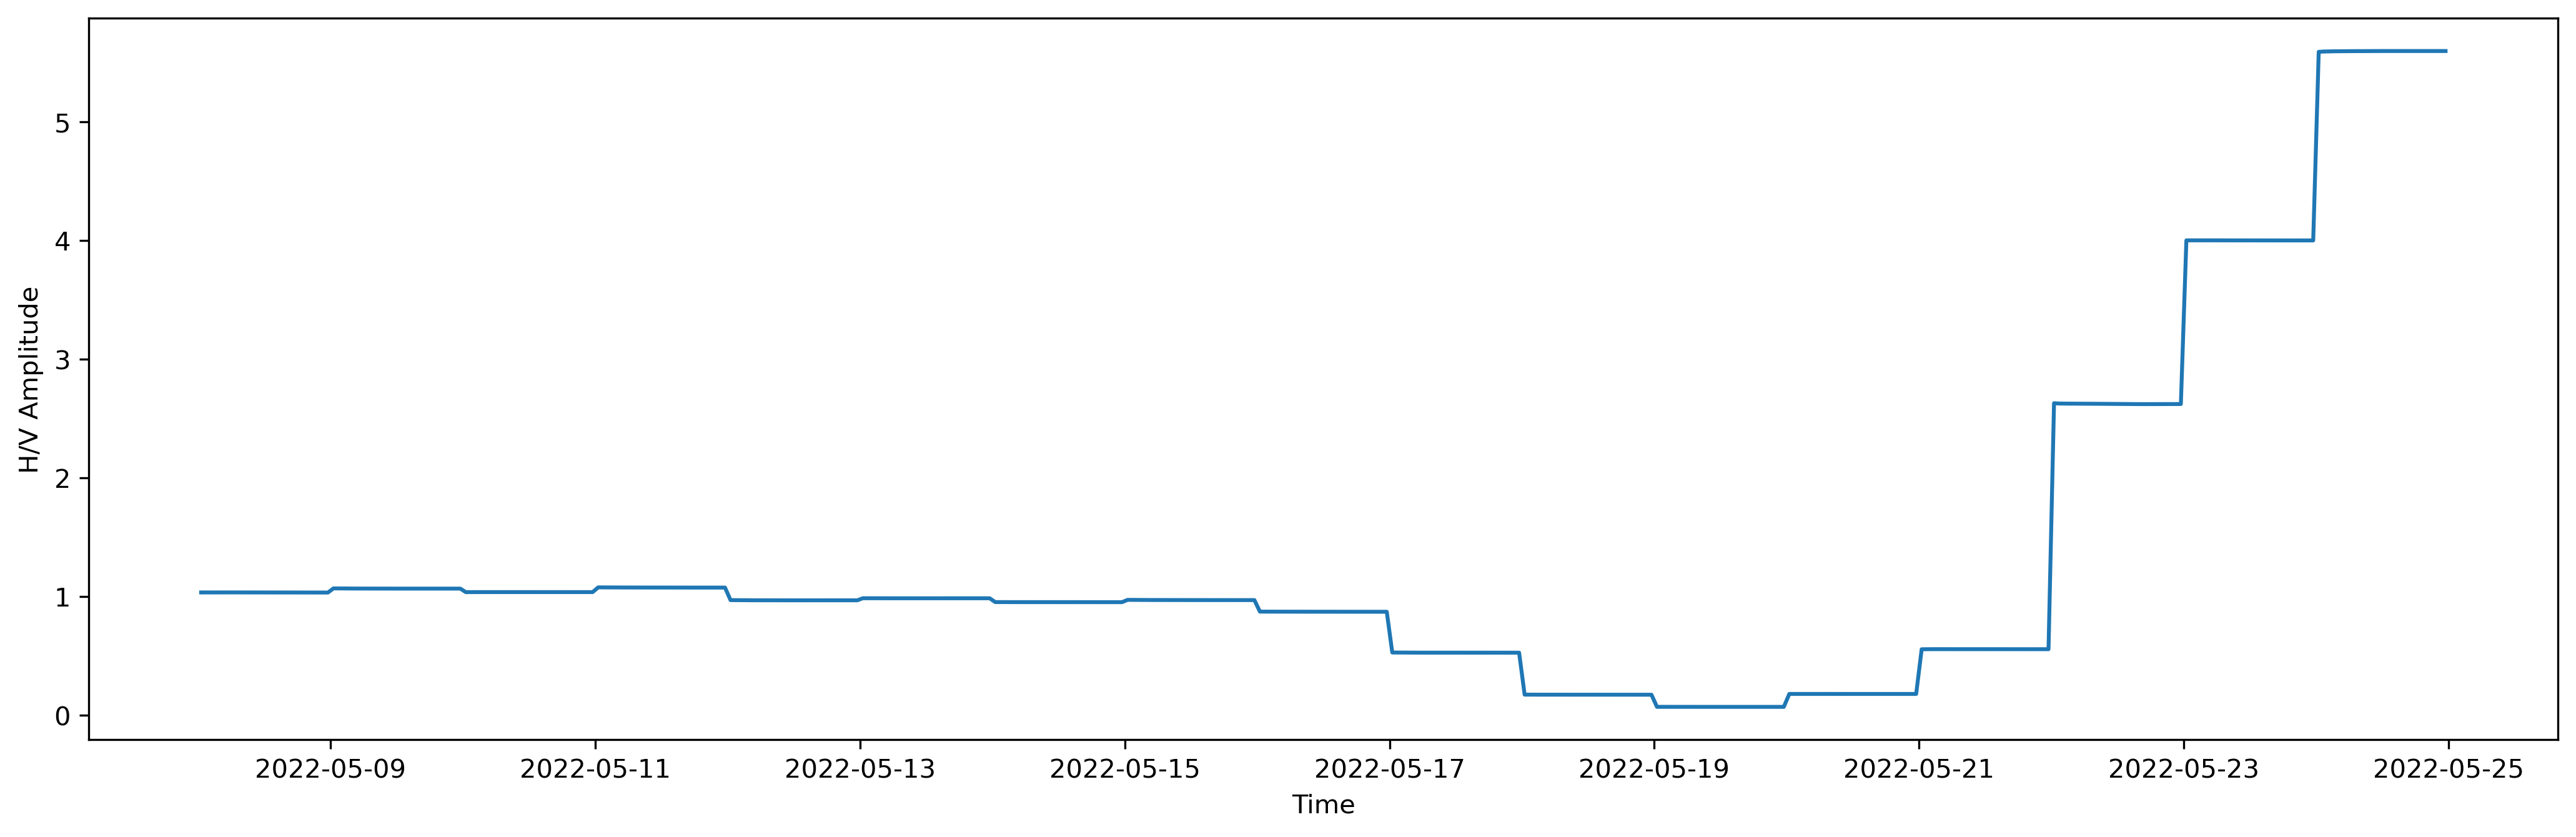

In [20]:
plt.figure(figsize=(17, 5), dpi=300)
plt.plot(HVTIME, HVFREQ)
plt.ylabel('H/V f0')
plt.show()
plt.figure(figsize=(17, 5), dpi=300)
plt.plot(HVTIME,HVAMP)
#plt.ylim(0.96,0.975)
plt.xlabel('Time')
plt.ylabel('H/V Amplitude')
plt.show()

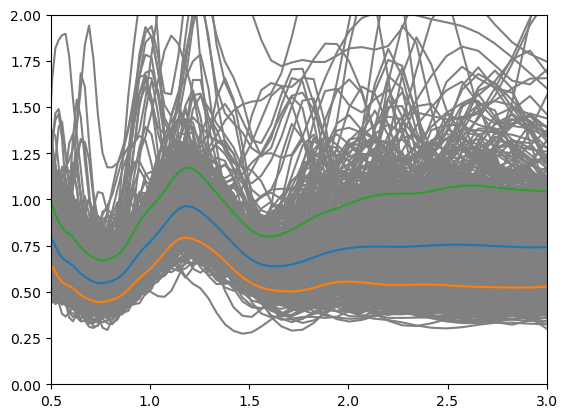

In [172]:
distribution_mc = "lognormal"

for amp in hv.amp[hv.valid_window_indices] :
    plt.plot(hv.frq, amp, c='grey')


plt.plot(hv.frq, hv.mean_curve(distribution_mc))
plt.plot(hv.frq, hv.nstd_curve(-1, distribution_mc))
plt.plot(hv.frq, hv.nstd_curve(+1, distribution_mc))
plt.xlim(0.5,3)
plt.ylim(0,2)
plt.show()

In [21]:
windowlenght = 200 #second
f_min = 0.5
f_max = 3

startdate = '2022.05.08'

startdate = datetime.datetime.strptime(startdate, '%Y.%m.%d')
startnumber = 3
days = 31 - startnumber

day = 1

date = startdate + datetime.timedelta(days = day)
datetimeStr = date.strftime("%Y.%m.%d.%H.%M.%S.000")
root = 'D:\\Nodes_ablation_zone\\All_comp_DP_\\'

namestt = '453020781.'

stts = {'e': root+namestt+str(startnumber+day)+'.'+datetimeStr+'.E.miniseed', 
        'n': root+namestt+str(startnumber+day)+'.'+datetimeStr+'.N.miniseed',
        'z': root+namestt+str(startnumber+day)+'.'+datetimeStr+'.Z.miniseed'}

sensor = hvsrpy.Sensor3c.from_mseed(fnames_1c=stts)

trace = obspy.read(root+namestt+str(startnumber+day)+'.'+datetimeStr+'.E.miniseed')

timesize = 10 #minutes
timestep = timesize*60
nbr_timestep = int(24*60*60/timestep)

starttrace = trace[0].stats.starttime

i = 1

starttime = starttrace+i*timestep
            
endtime = starttime+timestep
print([starttime, endtime])

maxfreq, maxamp, meanamp, frq = hv_maximum(sensor, starttime, endtime, windowlenght, f_min, f_max)

temptime = datetime.datetime.strptime(str(starttime+timestep/2), '%Y-%m-%dT%H:%M:%S.000000Z')

[UTCDateTime(2022, 5, 9, 0, 10), UTCDateTime(2022, 5, 9, 0, 20)]
Processing accomplished in 33.421875 seconds
